In [1]:
# imports
import pandas as pd
import geopandas as gpd
import geojson
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry
import geopy
from geopy.geocoders import Nominatim
import plotly
import plotly.express as px
import json
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# for matplotlib figures have a better pixels to save image
plt.rcParams['figure.dpi'] = 100

In [3]:
# upload geodata
states_amazon = gpd.read_file('PRODES_Deforestation_in_Amazonia.shp')

In [4]:
states_amazon.head()

,FID,ID,ORIGIN_ID,STATE,PATH_ROW,MAIN_CLASS,CLASS_NAME,DEF_CLOUD,JULIAN_DAY,IMAGE_DATE,YEAR,AREA_KM,SCENE_ID,PUBLISH_YE,SOURCE,SATELLITE,SENSOR,Shape__Are,Shape__Len,geometry
0,1,823204,32218,PA,22764,DESMATAMENTO,d2018,0,202,2018-07-21 12:00:00,2018,7.055576e-05,101048,2018-01-01,None,None,None,71.886230,66.316744,"POLYGON ((-55.42015 -6.30352, -55.42008 -6.303..."
1,2,823686,32704,PA,22464,DESMATAMENTO,d2018,0,197,2018-07-16 12:00:00,2018,1.499971e-05,101026,2018-01-01,None,None,None,15.270508,547.304654,"POLYGON ((-50.17676 -6.09071, -50.17849 -6.088..."
2,3,823766,32785,AM,23266,DESMATAMENTO,d2018,0,205,2018-07-24 12:00:00,2018,3.202793e-06,101062,2018-01-01,None,None,None,3.289551,424.886018,"POLYGON ((-63.89284 -8.14983, -63.89097 -8.149..."
3,4,823844,32862,AM,23266,DESMATAMENTO,d2018,0,205,2018-07-24 12:00:00,2018,1.328430e-07,101062,2018-01-01,None,None,None,0.136719,5.649947,"POLYGON ((-64.00611 -8.57198, -64.00609 -8.571..."
4,5,120162,370649,RR,23258,DESMATAMENTO,d2013,0,239,2013-08-27 12:00:00,2013,5.142463e-04,2099,2013-01-01,None,None,None,518.906006,156.203923,"POLYGON ((-61.69033 2.76777, -61.69020 2.76840..."


In [5]:
#states_amazon.plot()
#plt.show()

In [6]:
# lowercase column names
states_amazon.columns = map(str.lower,states_amazon.columns)

In [7]:
#states_amazon.isnull().sum()

In [8]:
# get the month, year, and day
states_amazon['image_date'] = pd.to_datetime(states_amazon['image_date'])
states_amazon['day'] = pd.to_datetime(states_amazon['image_date']).dt.day
states_amazon['month'] = pd.to_datetime(states_amazon['image_date']).dt.month
states_amazon['year'] = pd.to_datetime(states_amazon['image_date']).dt.year

In [9]:
# retrieve latitude and longitude
states_amazon = states_amazon.to_crs("EPSG:4326")
states_amazon['lon'] = states_amazon.centroid.x
states_amazon['lat'] = states_amazon.centroid.y

<ipython-input-9-bb581195290c>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states_amazon['lon'] = states_amazon.centroid.x
<ipython-input-9-bb581195290c>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states_amazon['lat'] = states_amazon.centroid.y


In [10]:
# add states names # ['Para', 'Mato Grosso', 'Rondonia', 'Amazonias', 'Acre', 'Roraima', 'Amapa', 'Tocantins']
states_amazon['states'] = states_amazon['state'].replace({'PA': 'Para', 'MT': 'Mato Grosso', 'RO': 'Rondonia', 'AM': 'Amazonas',
                                   'MA': 'Maranhao', 'AC': 'Acre', 'RR': 'Roraima',
                                  'AP': 'Amapa', 'TO': 'Tocantins'})

In [11]:
states_amazon.head()

,fid,id,origin_id,state,path_row,main_class,class_name,def_cloud,julian_day,image_date,...,satellite,sensor,shape__are,shape__len,geometry,day,month,lon,lat,states
0,1,823204,32218,PA,22764,DESMATAMENTO,d2018,0,202,2018-07-21 12:00:00,...,None,None,71.886230,66.316744,"POLYGON ((-55.42015 -6.30352, -55.42008 -6.303...",21.0,7.0,-55.420054,-6.303501,Para
1,2,823686,32704,PA,22464,DESMATAMENTO,d2018,0,197,2018-07-16 12:00:00,...,None,None,15.270508,547.304654,"POLYGON ((-50.17676 -6.09071, -50.17849 -6.088...",16.0,7.0,-50.177911,-6.089558,Para
2,3,823766,32785,AM,23266,DESMATAMENTO,d2018,0,205,2018-07-24 12:00:00,...,None,None,3.289551,424.886018,"POLYGON ((-63.89284 -8.14983, -63.89097 -8.149...",24.0,7.0,-63.891592,-8.149580,Amazonas
3,4,823844,32862,AM,23266,DESMATAMENTO,d2018,0,205,2018-07-24 12:00:00,...,None,None,0.136719,5.649947,"POLYGON ((-64.00611 -8.57198, -64.00609 -8.571...",24.0,7.0,-64.006096,-8.571971,Amazonas
4,5,120162,370649,RR,23258,DESMATAMENTO,d2013,0,239,2013-08-27 12:00:00,...,None,None,518.906006,156.203923,"POLYGON ((-61.69033 2.76777, -61.69020 2.76840...",27.0,8.0,-61.690243,2.767979,Roraima


In [12]:
# remove some columns
states_amazon = states_amazon.drop(columns=['image_date', 'source', 'satellite', 'sensor'])

In [13]:
#states_amazon.info()

In [14]:
# get rid of zeros
states_amazon_a = states_amazon.dropna()

In [15]:
states_amazon_a.isnull().sum()

fid           0
id            0
origin_id     0
state         0
path_row      0
main_class    0
class_name    0
def_cloud     0
julian_day    0
year          0
area_km       0
scene_id      0
publish_ye    0
shape__are    0
shape__len    0
geometry      0
day           0
month         0
lon           0
lat           0
states        0
dtype: int64

C:\Users\akinl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_km'>

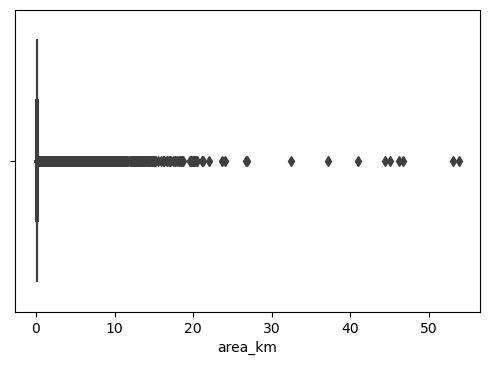

In [16]:
sns.boxplot(states_amazon_a.area_km)

In [17]:
# remove outliers (values that are more than 3 standard deviations from the mean)
z_scores = zscore(states_amazon_a['area_km'])
z_scores_abs = np.abs(z_scores)
z_scores_abs
z_scores_filtered = z_scores < 3
states_amazon_a = states_amazon_a[z_scores_filtered]

In [19]:
states_amazon_a.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 512257 entries, 0 to 518333
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   fid         512257 non-null  int64   
 1   id          512257 non-null  int64   
 2   origin_id   512257 non-null  int64   
 3   state       512257 non-null  object  
 4   path_row    512257 non-null  object  
 5   main_class  512257 non-null  object  
 6   class_name  512257 non-null  object  
 7   def_cloud   512257 non-null  int64   
 8   julian_day  512257 non-null  int64   
 9   year        512257 non-null  float64 
 10  area_km     512257 non-null  float64 
 11  scene_id    512257 non-null  int64   
 12  publish_ye  512257 non-null  object  
 13  shape__are  512257 non-null  float64 
 14  shape__len  512257 non-null  float64 
 15  geometry    512257 non-null  geometry
 16  day         512257 non-null  float64 
 17  month       512257 non-null  float64 
 18  lon         5122

C:\Users\akinl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_km'>

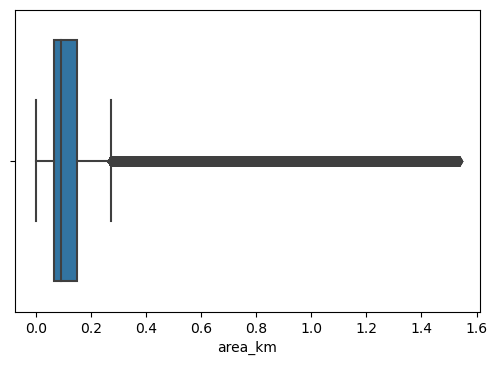

In [20]:
sns.boxplot(states_amazon_a.area_km)

In [21]:
# Import everything for models
import category_encoders as ce
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Average of the target variable 

#mean_lon = np.mean(states_amazon_a['lon'])
#print(f'Longitude: {mean_lon}')

#mean_lat = np.mean(states_amazon_a['lat'])
#print(f'Latitude: {mean_lat}')

In [23]:
# train/val/test split timebased 
train = states_amazon_a[states_amazon_a['year'] <= 2016]
val = states_amazon_a[states_amazon_a['year'] == 2017]
test = states_amazon_a[states_amazon_a['year'] >= 2018]

train.shape, val.shape, test.shape

((389504, 21), (40826, 21), (81927, 21))

In [24]:
# leave 4 decimal places for Areakm_squared, lat and lon
train = train.round({"lon":3, "lat":3})
val = val.round({'lon':3, 'lat':3})
test = test.round({'lon':3, 'lat':3})

In [25]:
# define target
target1 = 'lon'
target2 = 'lat'

dropped = ['fid', 'id', 'state', 'origin_id', 'main_class', 'path_row', 
           'scene_id', 'geometry', 'def_cloud', 'julian_day', 'class_name', 'publish_ye', 'shape__are', 'shape__len'] 

# define features
features = train.drop(columns=[target1] + [target2] + dropped).columns.tolist()

In [26]:
features

['year', 'area_km', 'day', 'month', 'states']

In [27]:
target1, target2

('lon', 'lat')

In [28]:
# Define X and y 
X_train = train[features]
y_train_1 = train[target1]
y_train_2 = train[target2]
X_val = val[features]
y_val_1 = val[target1]
y_val_2 = val[target2]
X_test = test[features]
y_test_1 = test[target1]
y_test_2 = test[target2]

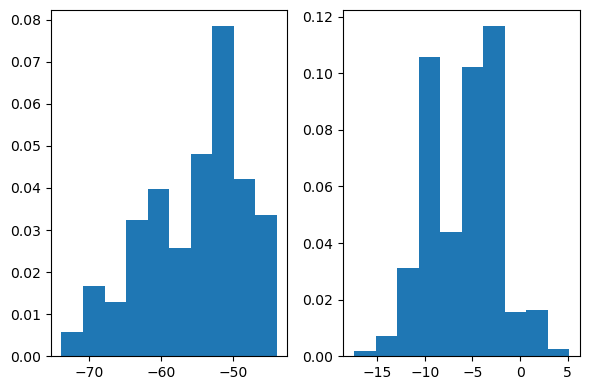

In [29]:
# distribution population data
fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].hist(y_train_1, bins=10, density=True)
axs[1].hist(y_train_2, bins=10, density=True);

In [30]:
###################################    MODELLING    ###########################################################

In [31]:
# 1st_MODEL--- RIDGE REGRESSION 
ridge_model = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k='all'), 
    Ridge(alpha=1)
)

ridge_model.fit(X_train, y_train_1)
y_val_pred_1 = ridge_model.predict(X_val)
ridge_model.fit(X_train, y_train_2)
y_val_pred_2 = ridge_model.predict(X_val)

print(f'Ridge model validation MAE: {mean_absolute_error(y_val_1, y_val_pred_1):.6f} lon')
print(f'Ridge model validation MAE: {mean_absolute_error(y_val_2, y_val_pred_2):.6f} lat')
print(f'Ridge model Validation RMSE loss: {mean_squared_error(y_val_1, y_val_pred_1):.6f} lon')
print(f'Ridge model Validation RMSE loss: {mean_squared_error(y_val_2, y_val_pred_2):.6f} lat')
print(f'Ridge model Validation R^2 coefficient: {r2_score(y_val_1, y_val_pred_1):.6f} lon')
print(f'Ridge model Validation R^2 coefficient: {r2_score(y_val_2, y_val_pred_2):.6f} lat')

C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Ridge model validation MAE: 1.929156 lon
Ridge model validation MAE: 1.347259 lat
Ridge model Validation RMSE loss: 6.071610 lon
Ridge model Validation RMSE loss: 2.861498 lat
Ridge model Validation R^2 coefficient: 0.861630 lon
Ridge model Validation R^2 coefficient: 0.783521 lat


In [32]:
# true distribution vs predicted for Ridge Regression
#fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(6,6))

#axs[0, 0].hist(y_val_1, bins=50, density=True)
#axs[0, 1].hist(y_val_pred_1, bins=50, density=True);
#axs[1, 0].hist(y_val_2, bins=50, density=True)
#axs[1, 1].hist(y_val_pred_2, bins=50, density=True);


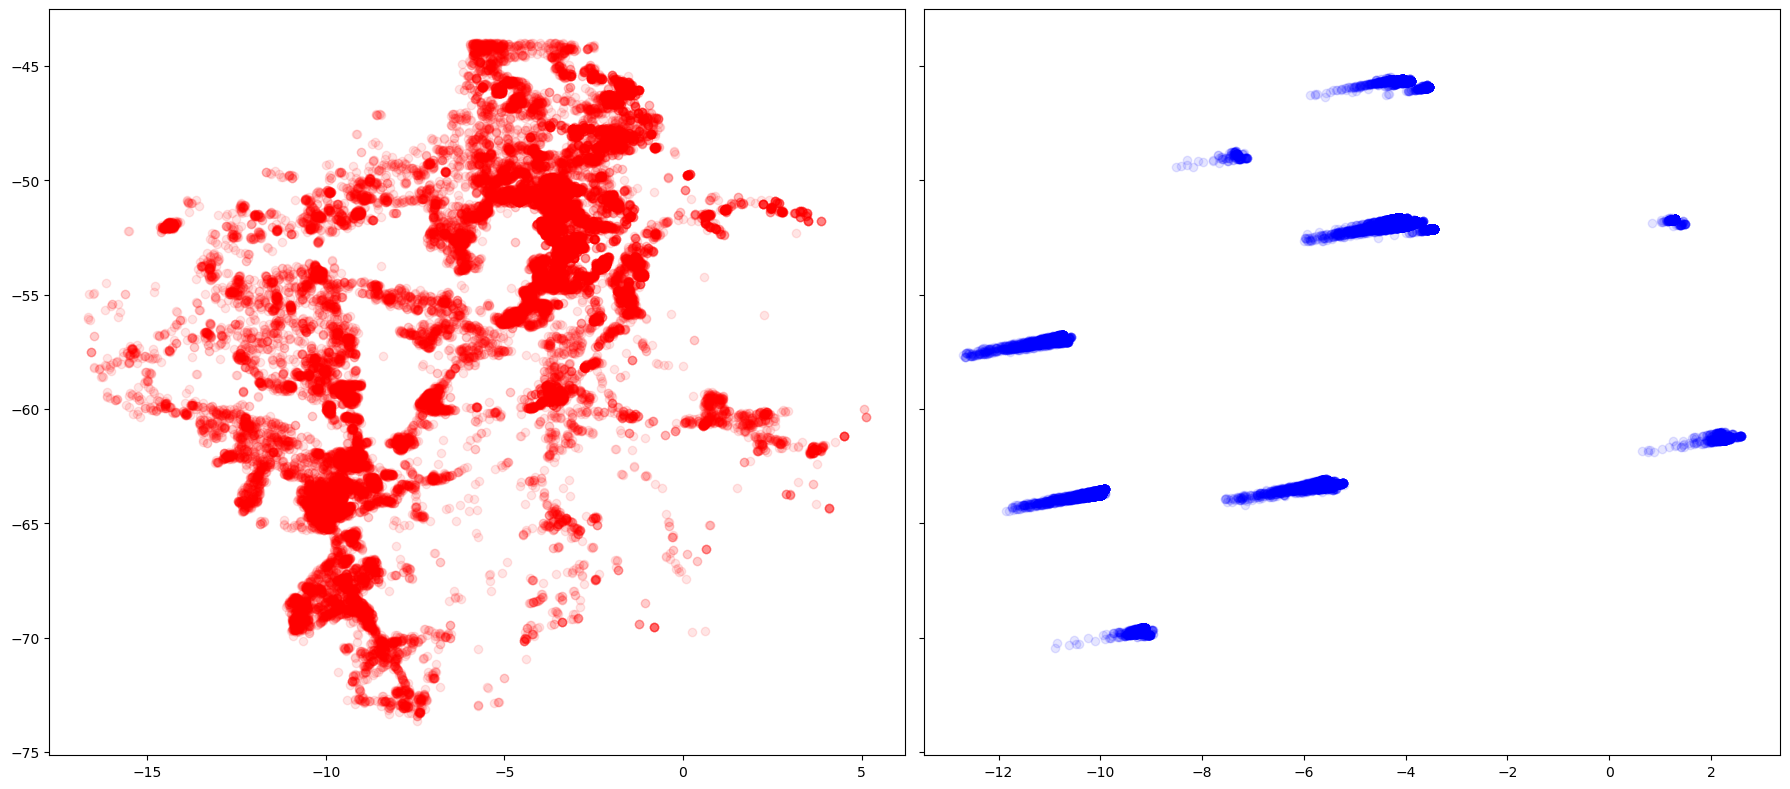

In [33]:
# How Ridge model looks on graph
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_val_2, y=y_val_1, c='red', alpha=0.1)
axs[1].scatter(x=y_val_pred_2, y=y_val_pred_1, c='blue', alpha=0.1);

In [34]:
# 2nd_MODEL--- DECISION TREE 
dt1 = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeRegressor(random_state=42)
)
dt2 = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='mean'), 
    DecisionTreeRegressor(random_state=42)
)

dt1.fit(X_train, y_train_1)
y_val_pred_1 = dt1.predict(X_val)
dt2.fit(X_train, y_train_2)
y_val_pred_2 = dt2.predict(X_val)

print(f'Desicion Tree validation MAE: {mean_absolute_error(y_val_1, y_val_pred_1):.6f} lon')
print(f'Desicion Tree validation MAE: {mean_absolute_error(y_val_2, y_val_pred_2):.6f} lat')
print(f'Desicion Tree Validation RMSE loss: {mean_squared_error(y_val_1, y_val_pred_1):.6f} lon')
print(f'Desicion Tree Validation RMSE loss: {mean_squared_error(y_val_2, y_val_pred_2):.6f} lat')
print(f'Desicion Tree Validation R^2 coefficient: {r2_score(y_val_1, y_val_pred_1):.6f} lon')
print(f'Desicion Tree Validation R^2 coefficient: {r2_score(y_val_2, y_val_pred_2):.6f} lat')

C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\akinl\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Desicion Tree validation MAE: 4.797137 lon
Desicion Tree validation MAE: 1.862873 lat
Desicion Tree Validation RMSE loss: 28.544813 lon
Desicion Tree Validation RMSE loss: 5.593452 lat
Desicion Tree Validation R^2 coefficient: 0.349471 lon
Desicion Tree Validation R^2 coefficient: 0.576842 lat


In [35]:
# true vs predicted values distribution decision tree population set
#fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(7,7))

#axs[0, 0].hist(y_val_1, bins=50, density=True)
#axs[0, 1].hist(y_val_pred_1, bins=50, density=True);
#axs[1, 0].hist(y_val_2, bins=50, density=True)
#axs[1, 1].hist(y_val_pred_2, bins=50, density=True);

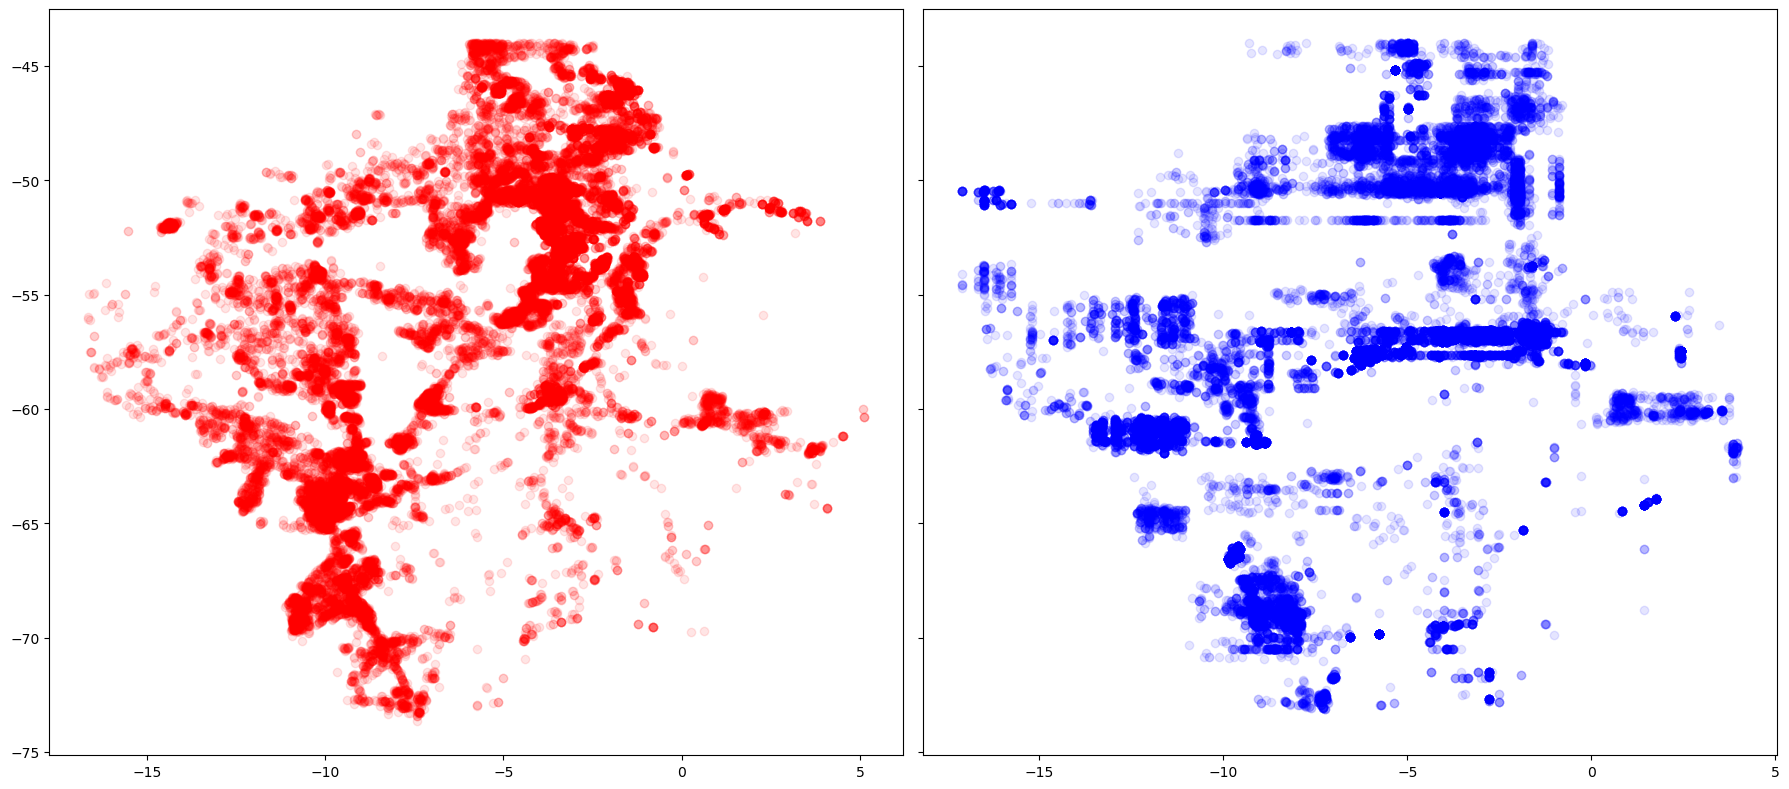

In [36]:
# true vs predicted values visualization population set for Decision Tree
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_val_2, y=y_val_1, c='red', alpha=0.1)
axs[1].scatter(x=y_val_pred_2, y=y_val_pred_1, c='blue', alpha=0.1);

In [37]:
# 3rd_MODEL---XGBoost REGRESSION 
encoder = ce.ordinal.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model1 = XGBRegressor(
    n_estimators=1000, # upper threshold
    max_depth=100,
    learning_rate=0.4, 
    n_jobs=-1
)
model2 = XGBRegressor(
    n_estimators=1000, # upper threshold
    max_depth=100,
    learning_rate=0.4, 
    n_jobs=-1
)

eval_set1 = [(X_train_encoded, y_train_1), 
            (X_val_encoded, y_val_1)]
eval_set2 = [(X_train_encoded, y_train_2), 
            (X_val_encoded, y_val_2)]

model1.fit(X_train_encoded, y_train_1,
          eval_set=eval_set1,
          eval_metric='rmse',
          early_stopping_rounds=50)
model2.fit(X_train_encoded, y_train_2,
          eval_set=eval_set2,
          eval_metric='rmse',
          early_stopping_rounds=50)

[0]	validation_0-rmse:33.80132	validation_1-rmse:33.94323
[1]	validation_0-rmse:20.31218	validation_1-rmse:20.38055
[2]	validation_0-rmse:12.21610	validation_1-rmse:12.39065
[3]	validation_0-rmse:7.35764	validation_1-rmse:8.02142
[4]	validation_0-rmse:4.44729	validation_1-rmse:5.69333
[5]	validation_0-rmse:2.71222	validation_1-rmse:4.80814
[6]	validation_0-rmse:1.69081	validation_1-rmse:4.60188
[7]	validation_0-rmse:1.09736	validation_1-rmse:4.62642
[8]	validation_0-rmse:0.76274	validation_1-rmse:4.68238
[9]	validation_0-rmse:0.56951	validation_1-rmse:4.75056
[10]	validation_0-rmse:0.43622	validation_1-rmse:4.79818
[11]	validation_0-rmse:0.33872	validation_1-rmse:4.83114
[12]	validation_0-rmse:0.26999	validation_1-rmse:4.85119
[13]	validation_0-rmse:0.21771	validation_1-rmse:4.87041
[14]	validation_0-rmse:0.17660	validation_1-rmse:4.87770
[15]	validation_0-rmse:0.14461	validation_1-rmse:4.88320
[16]	validation_0-rmse:0.11859	validation_1-rmse:4.88523
[17]	validation_0-rmse:0.09908	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=100,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
model1.best_ntree_limit

7

In [41]:
model2.best_ntree_limit

5

In [45]:
# XGBoost trained on population

xgb1 = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=50)
)
xgb2 = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=50)
)

xgb1.fit(X_train, y_train_1)
y_val_pred_1 = xgb1.predict(X_val)
xgb2.fit(X_train, y_train_2)
y_val_pred_2 = xgb2.predict(X_val)

print(f'XGBoost Validation MAE: {mean_absolute_error(y_val_1, y_val_pred_1):.6f} lon')
print(f'XGBoost Validation MAE: {mean_absolute_error(y_val_2, y_val_pred_2):.6f} lat')

print(f'XGBoost Validation RMSE loss: {mean_squared_error(y_val_1, y_val_pred_1):.6f} lon')
print(f'XGBoost Validation RMSE loss: {mean_squared_error(y_val_2, y_val_pred_2):.6f} lat')

print(f'XGBoost Validation R^2 coefficient: {r2_score(y_val_1, y_val_pred_1):.6f} lon')
print(f'XGBoost Validation R^2 coefficient: {r2_score(y_val_2, y_val_pred_2):.6f} lat')


XGBoost Validation MAE: 4.381586 lon
XGBoost Validation MAE: 1.711661 lat
XGBoost Validation RMSE loss: 25.236562 lon
XGBoost Validation RMSE loss: 4.552240 lat
XGBoost Validation R^2 coefficient: 0.424865 lon
XGBoost Validation R^2 coefficient: 0.655612 lat


In [46]:
# true vs predicted values distribution Xgboost population set
#fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(7,7))

#axs[0, 0].hist(y_val_1, bins=50, density=True)
#axs[0, 1].hist(y_val_pred_1, bins=50, density=True);
#axs[1, 0].hist(y_val_2, bins=50, density=True)
#axs[1, 1].hist(y_val_pred_2, bins=50, density=True);

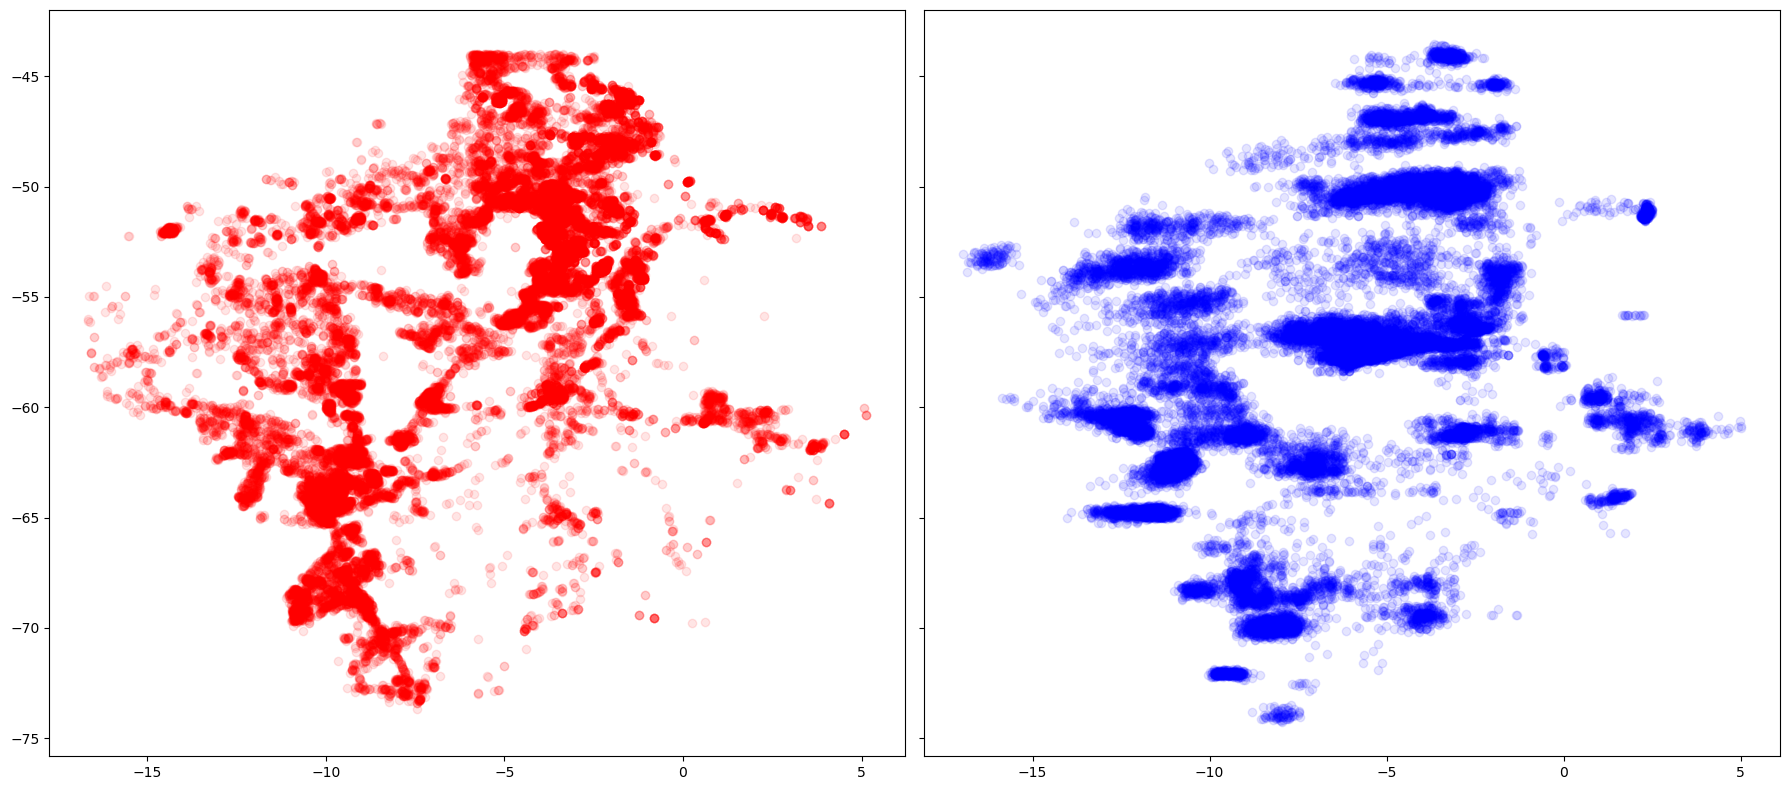

In [47]:
# true vs predicted values visualization population set for xgboost
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_val_2, y=y_val_1, c='red', alpha=0.1)
axs[1].scatter(x=y_val_pred_2, y=y_val_pred_1, c='blue', alpha=0.1);

In [48]:
#PREDICTION ON A ROW FROM VALIDATION POPULATION SET USING XGBOOST AND DECISION TREE MODELS#

In [49]:
# take a row from val set for X
val_row = X_val.iloc[[250]]
val_row

,year,area_km,day,month,states
2704,2017.0,0.005393,13.0,11.0,Maranhao


In [50]:
# true values from val set for y

print(y_val_1.iloc[[250]])
print(y_val_2.iloc[[250]])


2704   -45.594
Name: lon, dtype: float64
2704   -2.02
Name: lat, dtype: float64


In [51]:
# predicted values by xgboost model
xgb1.predict(val_row), xgb2.predict(val_row) 

(array([-45.46914], dtype=float32), array([-1.9517974], dtype=float32))

In [52]:
# predicted values by decision tree model
dt1.predict(val_row), dt2.predict(val_row)

(array([-46.]), array([-1.493]))

In [53]:
#PREDICT ON A ROW FROM TEST POPULATION SET USING XGBOOST AND DECISION TREE MODELS#

In [54]:
# take a row for test set
test_row = X_test.iloc[[0]]
test_row

,year,area_km,day,month,states
0,2018.0,0.000071,21.0,7.0,Para


In [55]:
# true values from test set
y_test_1.iloc[[0]], y_test_2.iloc[[0]]

(0   -55.42
 Name: lon, dtype: float64,
 0   -6.304
 Name: lat, dtype: float64)

In [56]:
# predicted values by xgboost model ON TEST POPULATION
xgb1.predict(test_row), xgb2.predict(test_row)

(array([-56.23386], dtype=float32), array([-5.5833755], dtype=float32))

In [57]:
# predicted values by decision tree model
dt1.predict(test_row), dt2.predict(test_row)

(array([-57.977]), array([-5.016]))

In [58]:
## PREDICTIONS ON TEST SET USING XGBOOST

In [59]:
# final predictions with xgboost
y_pred_1 = xgb1.predict(X_test)
y_pred_2 = xgb2.predict(X_test)

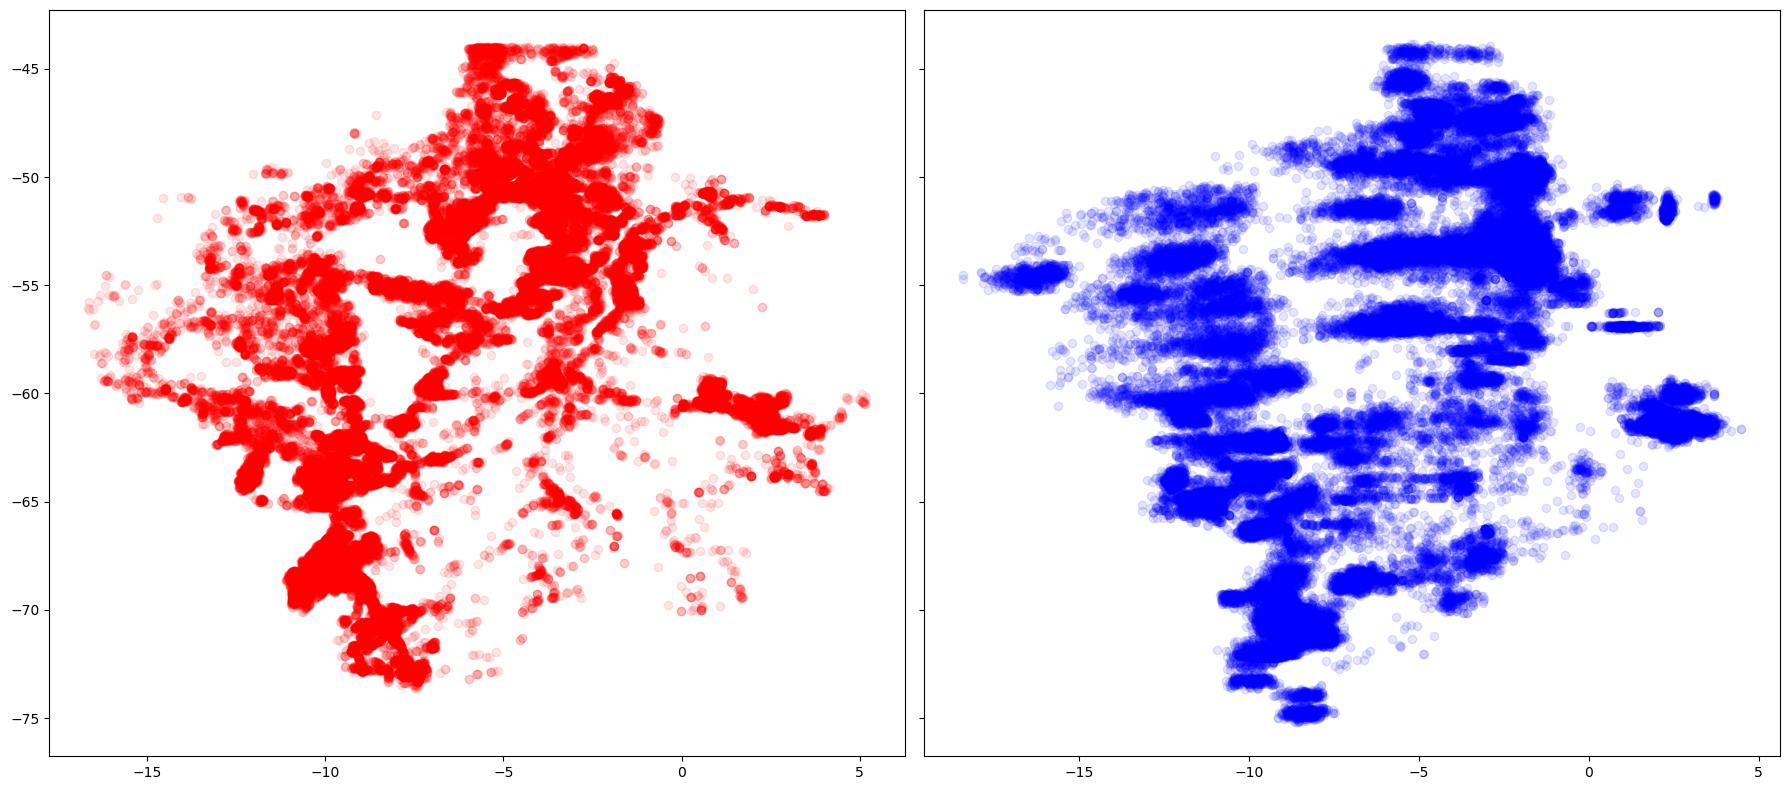

In [60]:
# true vs predicted values with xgboost visualization ON POPULATION
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_test_2, y=y_test_1, c='red', alpha=0.1)
axs[1].scatter(x=y_pred_2, y=y_pred_1, c='blue', alpha=0.1);

In [61]:
##PREDICTIONS ON TEST SET USING DECISION TREE

In [62]:
# final predictions with DT
y_pred_1 = dt1.predict(X_test)
y_pred_2 = dt2.predict(X_test)

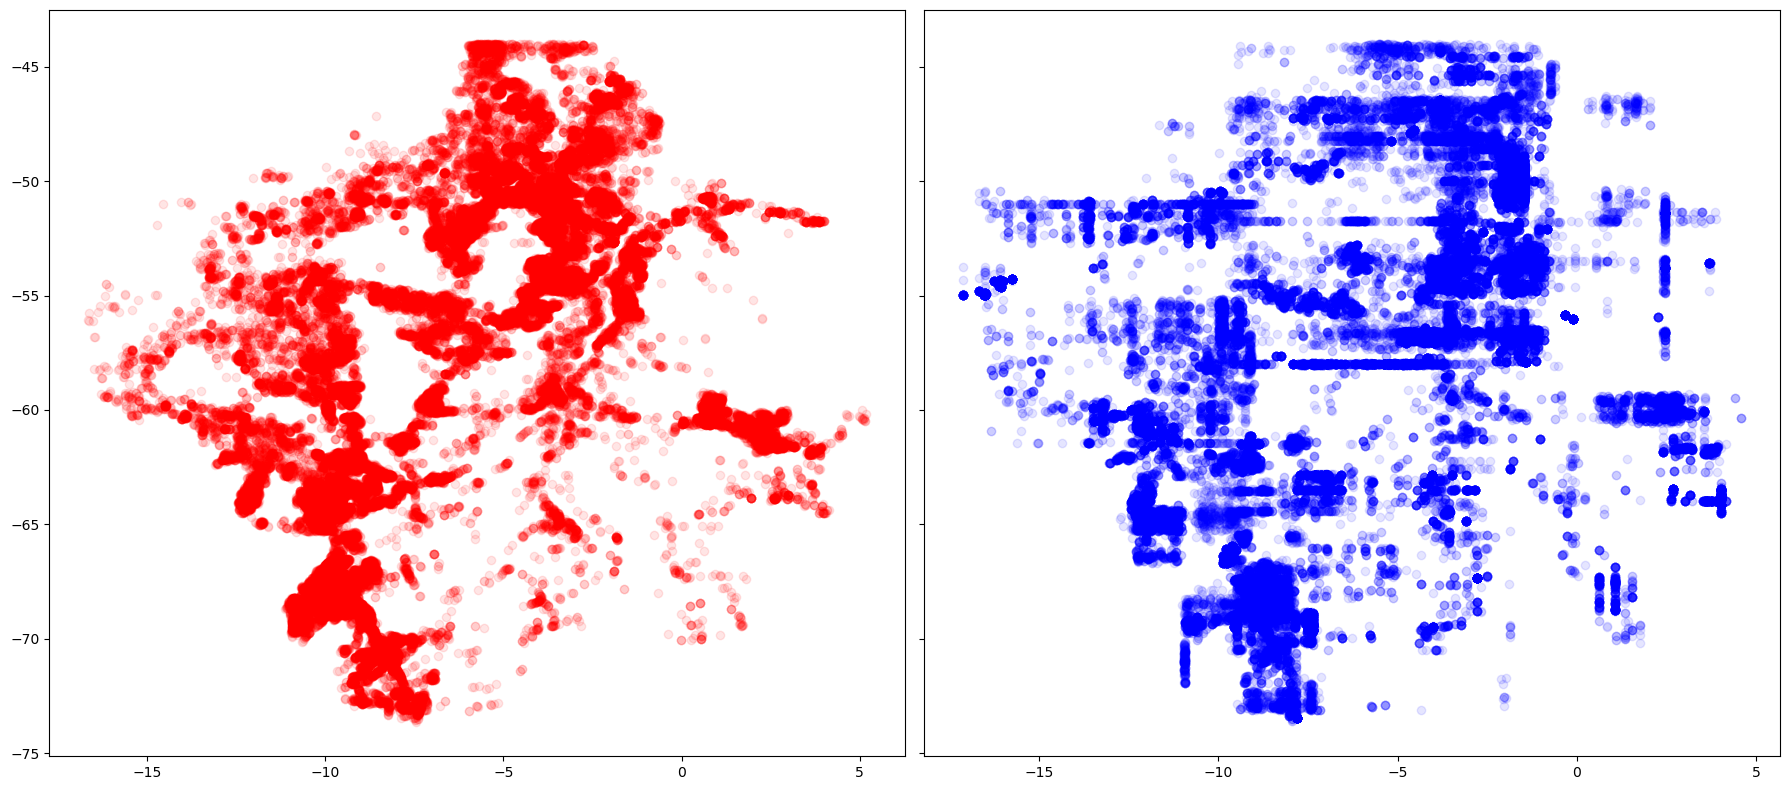

In [63]:
# true vs predicted values with DT visualization ON POPULATION
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(18,8))

axs[0].scatter(x=y_test_2, y=y_test_1, c='red', alpha=0.1)
axs[1].scatter(x=y_pred_2, y=y_pred_1, c='blue', alpha=0.1);

In [64]:
#      TESTING MODEL FOR PREDICTION ON NEW DATA USING XGBOOST

In [65]:
# DEFINE FUNCTION FOR XGBOOST MODEL  
def predict(year, area_km, day, month, states):

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[year, area_km, day, month, states]], 
        columns=['year', 'area_km', 'day', 'month', 'states']
    )
    
    # Get the model's prediction
    pred1 = xgb1.predict(df)[0]
    pred2 = xgb2.predict(df)[0]

    print(pred1)
    print(pred2)

    results = f'Longitude {pred1}, Latitude {pred2}'
    return results

In [66]:
predict(2026, 0.000071, 15, 3, 'para')

-61.421185
1.3531543


'Longitude -61.42118453979492, Latitude 1.3531543016433716'

In [67]:
# DEFINE FUNCTION FOR DECISION TREE MODEL   
def predict(year, area_km, day, month, states):

    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[year, area_km, day, month, states]], 
        columns=['year', 'area_km', 'day', 'month', 'states']
    )
    
    # Get the model's prediction
    pred1 = dt1.predict(df)[0]
    pred2 = dt2.predict(df)[0]

    print(pred1)
    print(pred2)

    results = f'Longitude {pred1}, Latitude {pred2}'
    return results

In [68]:
predict(2026, 0.000071, 15, 3, 'para')

-58.194
-9.13


'Longitude -58.194, Latitude -9.13'

In [69]:
########################                    END                          ###################################
########################       SO, XGBOOST SEEMS TO BE BIT BETTER        ###################################